In [1]:
import matplotlib.pyplot as plt
import numpy as np

import lsst.daf.butler as dB
import lsst.cp.verify.notebooks.utils as utils
import lsst.afw.display as afwDisplay

In [2]:
# This cell should be edited to match the data to be inspected.

# Which calibration type to analyse.
calibType = 'ptc' 
# Camera
cameraName = 'LSSTComCam'
numberDetectors = 9

# Set which display to use.
afwDisplay.setDefaultBackend("astrowidgets")

# Collection name containing the verification outputs. See DM-30171
verifyCollection = 'u/plazas/test-2022JUL28.lsstcomcam.1'
# Collection name containign the PTC dataset
genCollection = 'u/plazas/2022JUL25-ptc.comcam.FULLCOV.1'

In [3]:
# Get butler and camera
# the genCollection has the camera
butler = dB.Butler("/repo/main/", collections=[genCollection,verifyCollection])
camera = butler.get('camera', instrument=cameraName)

In [4]:
# Get Run Statistics
runStats = butler.get('verifyPtcStats', instrument=cameraName)
runSuccess = runStats.pop('SUCCESS')


In [5]:
runSuccess


False

In [6]:
runStats

{'Detector 0': {'FAILURES': ['Detector 0 NOISE']},
 'Detector 1': {'FAILURES': ['Detector 1 NOISE']},
 'Detector 2': {'FAILURES': ['Detector 2 NOISE']},
 'Detector 3': {'FAILURES': ['Detector 3 NOISE']},
 'Detector 4': {'FAILURES': ['Detector 4 NOISE']},
 'Detector 5': {'FAILURES': ['Detector 5 NOISE']},
 'Detector 6': {'FAILURES': ['Detector 6 NOISE']},
 'Detector 7': {'FAILURES': ['Detector 7 NOISE']},
 'Detector 8': {'FAILURES': ['Detector 8 NOISE']}}

In [7]:
# Display summary table of tests and failure counts.
utils.failureTable(runStats)



Detector 0,Detector,1
Detector 1,Detector,1
Detector 2,Detector,1
Detector 3,Detector,1
Detector 4,Detector,1
Detector 5,Detector,1
Detector 6,Detector,1
Detector 7,Detector,1
Detector 8,Detector,1


In [8]:
# Noise failed, let's look at the values
gainThreshold = 5  # percentage
noiseThreshold = 5 # percentage
for detId in range(9):
    calib = butler.get("ptc", instrument="LSSTComCam", detector=detId)
    detector = camera[detId]
    print (f"Detector ID: {detId}")
    for amp in detector:
        ampName = amp.getName()
        diffGain = np.abs(calib.gain[ampName] - amp.getGain()) / amp.getGain()
        diffNoise = np.abs(calib.noise[ampName] - amp.getReadNoise()) / amp.getReadNoise()
        testGain = bool(diffGain < gainThreshold)
        testNoise = bool(diffNoise < noiseThreshold)
        if testNoise:
            print ('FAILURE NOISE:', ampName, diffNoise , calib.noise[ampName], amp.getReadNoise())
    print(" ")
    

Detector ID: 0
FAILURE NOISE: C10 3.289474998510459 -16.02632498957321 7.0
FAILURE NOISE: C17 1.7625095878123385 -5.337567114686368 7.0
FAILURE NOISE: C00 3.734407056203763 -19.14084939342634 7.0
 
Detector ID: 1
FAILURE NOISE: C11 0.5710324662701755 3.002772736108772 7.0
FAILURE NOISE: C12 1.942179474678813 -6.595256322751692 7.0
FAILURE NOISE: C13 2.515131874534603 -10.605923121742224 7.0
FAILURE NOISE: C14 0.4523962480767964 10.166773736537575 7.0
FAILURE NOISE: C15 1.2827467033200999 -1.9792269232406996 7.0
FAILURE NOISE: C16 2.868737893798768 -13.081165256591374 7.0
FAILURE NOISE: C06 0.9298818694448077 13.509173086113654 7.0
FAILURE NOISE: C05 2.5816354687334604 25.071448281134224 7.0
FAILURE NOISE: C04 0.02152957577924841 7.150707030454739 7.0
FAILURE NOISE: C03 1.0229236397003336 14.160465477902335 7.0
FAILURE NOISE: C02 4.990849290073286 41.935945030513004 7.0
FAILURE NOISE: C01 0.9942529468988309 0.04022937170818312 7.0
FAILURE NOISE: C00 3.793382540256226 -19.55367778179358 

In [9]:
# Det stats
for detId in range(numberDetectors):
    detStats = butler.get("verifyPtcDetStats", instrument="LSSTComCam", detector=detId)
    print (detId, detStats)

0 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
1 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
2 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
3 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
4 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
5 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
6 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
7 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}
8 {'AMP': {}, 'DET': {}, 'SUCCESS': False, 'VERIFY': {'NOISE': False}}


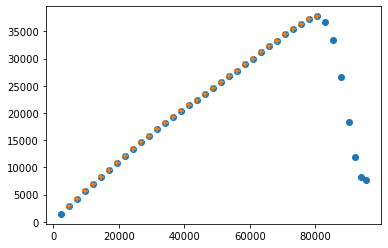

C00 Continue? [c, q] c


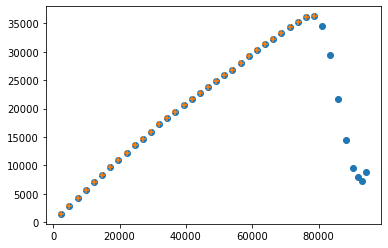

C01 Continue? [c, q] c


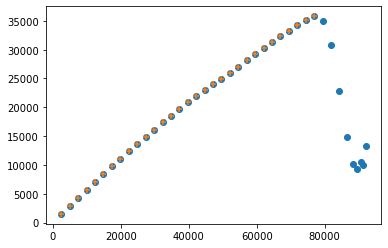

C02 Continue? [c, q] c


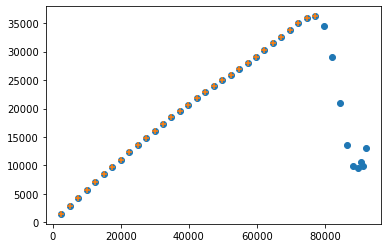

C03 Continue? [c, q] c


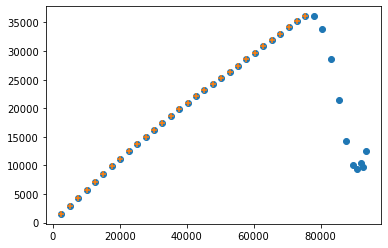

C04 Continue? [c, q] q


In [10]:
# Plot PTCs
for detId in range(numberDetectors): 
    ptc = butler.get('ptc', instrument=cameraName, detector=detId)
    continueDisplay=True
    for amp in np.unique(ptc.ampNames):
        plt.scatter(ptc.rawMeans[amp], ptc.rawVars[amp], marker='o', label="PTC-raw")

        plt.scatter(ptc.finalMeans[amp], ptc.finalVars[amp], marker='+', label="PTC")
        plt.show()
    
        while True:
            ans = input(f"{amp} Continue? [c, q]").lower()
            if ans in ("", "c",):
                break
            if ans in ('q', 'x'):
                continueDisplay = False
                break
        if continueDisplay is False:
            break
    if continueDisplay is False:
            break

In [11]:
ptc.gain, ptc.noise

({'C00': 1.659065937346196,
  'C01': 1.6882955899907075,
  'C02': 1.6922147264534322,
  'C03': 1.681152532100217,
  'C04': 1.690808220613901,
  'C05': 1.6908557400504332,
  'C06': 1.6914746875859994,
  'C07': 1.6756393102892317,
  'C10': 1.5586776175280925,
  'C11': 1.6064279294197885,
  'C12': 1.5951152955547043,
  'C13': 1.5934941349332679,
  'C14': 1.6037695928419258,
  'C15': 1.598515125193371,
  'C16': 1.5774291154349869,
  'C17': 1.5462370556701628},
 {'C00': -19.14084939342634,
  'C01': 83.61158861861223,
  'C02': 144.11072944799136,
  'C03': 89.8812896047889,
  'C04': 104.99470432581003,
  'C05': 87.05835900127356,
  'C06': 100.22652313835246,
  'C07': 132.43529035148612,
  'C10': -16.02632498957321,
  'C11': 84.59689126825099,
  'C12': 83.05153151366628,
  'C13': 95.8315980066787,
  'C14': 192.74154079552605,
  'C15': 70.69352843165429,
  'C16': -32.79134604771789,
  'C17': -5.337567114686368})